# TOPIC: To accurately predict the Length of Stay(LOS) for each patient on case by case basis so that the Hospitals can use this information for optimal resource allocation and better functioning. The length of stay is divided into 11 different classes ranging from 0-10 days to more than 100 days.

## Setting the notebook and importing files

### Importing the librabries

In [1]:
import numpy as np 
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import sys
from sklearn.feature_selection import VarianceThreshold
from sklearn import metrics
from sklearn import preprocessing
import statsmodels.api as sm
from category_encoders import TargetEncoder
from IPython.display import display
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

### Removing the warnings and setting the grid style

In [2]:
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

### Importing the file and checking the columns and rows

In [3]:
patients_train= pd.read_csv('train_data.csv')
patients_train_dict= pd.read_csv('train_data_dictionary.csv')

## General Analysis

In [4]:
print("Rows and Columns for the training dataset:")
print("Rows:",patients_train.shape[0])
print("Columns:",patients_train.shape[1])

Rows and Columns for the training dataset:
Rows: 318438
Columns: 18


In [5]:
print("Column Names:",patients_train.columns)

Column Names: Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay'],
      dtype='object')


In [6]:
patients_train_dict

,Column,Description
0,case_id,Case_ID registered in Hospital
1,Hospital_code,Unique code for the Hospital
2,Hospital_type_code,Unique code for the type of Hospital
3,City_Code_Hospital,City Code of the Hospital
4,Hospital_region_code,Region Code of the Hospital
5,Available Extra Rooms in Hospital,Number of Extra rooms available in the Hospital
6,Department,Department overlooking the case
7,Ward_Type,Code for the Ward type
8,Ward_Facility_Code,Code for the Ward Facility
9,Bed Grade,Condition of Bed in the Ward


In [7]:
patients_train.describe()

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit
count,318438.000000,318438.000000,318438.000000,318438.000000,318325.000000,318438.000000,313906.000000,318438.000000,318438.000000
mean,159219.500000,18.318841,4.771717,3.197627,2.625807,65747.579472,7.251859,3.284099,4880.749392
std,91925.276847,8.633755,3.102535,1.168171,0.873146,37979.936440,4.745266,1.764061,1086.776254
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1800.000000
25%,79610.250000,11.000000,2.000000,2.000000,2.000000,32847.000000,4.000000,2.000000,4186.000000
50%,159219.500000,19.000000,5.000000,3.000000,3.000000,65724.500000,8.000000,3.000000,4741.000000
75%,238828.750000,26.000000,7.000000,4.000000,3.000000,98470.000000,8.000000,4.000000,5409.000000
max,318438.000000,32.000000,13.000000,24.000000,4.000000,131624.000000,38.000000,32.000000,11008.000000


In [8]:
patients_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [9]:
patients_train.head(10)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50
5,6,23,a,6,X,2,anesthesia,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,4449.0,11-20
6,7,32,f,9,Y,1,radiotherapy,S,B,3.0,31397,7.0,Emergency,Extreme,2,51-60,6167.0,0-10
7,8,23,a,6,X,4,radiotherapy,Q,F,3.0,31397,7.0,Trauma,Extreme,2,51-60,5571.0,41-50
8,9,1,d,10,Y,2,gynecology,R,B,4.0,31397,7.0,Trauma,Extreme,2,51-60,7223.0,51-60
9,10,10,e,1,X,2,gynecology,S,E,3.0,31397,7.0,Trauma,Extreme,2,51-60,6056.0,31-40


In [10]:
from collections import Counter
Counter(patients_train['Stay'].tolist())

Counter({'0-10': 23604,
         '41-50': 11743,
         '31-40': 55159,
         '11-20': 78139,
         '51-60': 35018,
         '21-30': 87491,
         '71-80': 10254,
         'More than 100 Days': 6683,
         '81-90': 4838,
         '61-70': 2744,
         '91-100': 2765})

### Finding out the no of Null Values and calculating their percentage for each column

In [11]:
print("Total no of null values in each column:")
print(patients_train.isnull().sum())

Total no of null values in each column:
case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64


In [12]:
percent_missing = patients_train.isnull().sum() * 100 / len(patients_train)
missing_value_df = pd.DataFrame({'column_name': patients_train.columns,
                                 'Values missing(%)': percent_missing})
missing_value_df

,column_name,Values missing(%)
case_id,case_id,0.000000
Hospital_code,Hospital_code,0.000000
Hospital_type_code,Hospital_type_code,0.000000
City_Code_Hospital,City_Code_Hospital,0.000000
Hospital_region_code,Hospital_region_code,0.000000
Available Extra Rooms in Hospital,Available Extra Rooms in Hospital,0.000000
Department,Department,0.000000
Ward_Type,Ward_Type,0.000000
Ward_Facility_Code,Ward_Facility_Code,0.000000
Bed Grade,Bed Grade,0.035486


Null values are found only in 'City_Code_Patient' and 'Bed Grade'

### Removing the null values

In [13]:
patients_train = patients_train.dropna()

In [14]:
print("Rows and Columns for the training dataset:")
print("Rows:",patients_train.shape[0])
print("Columns:",patients_train.shape[1])

Rows and Columns for the training dataset:
Rows: 313793
Columns: 18


### Finding out the number of duplicate rows in the dataset 

In [15]:
duplicate = patients_train[patients_train.duplicated()]
print("Duplicate Rows :")
duplicate

Duplicate Rows :


,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay


In [16]:
print("No of duplicate rows:",duplicate.shape[0])

No of duplicate rows: 0


### Finding out the no of duplicate columns in the dataset

In [17]:
print("Rows and Columns for the training dataset:")
print("Rows:",patients_train.shape[0])
print("Columns:",patients_train.shape[1])

Rows and Columns for the training dataset:
Rows: 313793
Columns: 18


In [18]:
def findDupCol(patients_train):
    dupColNames = set()
    for x in range(patients_train.shape[1]):
        col1 = patients_train.iloc[:,x]
        for y in range(x+1,patients_train.shape[1]):
            col2 = patients_train.iloc[:,y]
            if col1.equals(col2):
                dupColNames.add(patients_train.columns.values[y])
    return list(dupColNames)
duplicate_col = findDupCol(patients_train)

In [19]:
patients_train.drop(columns=duplicate_col,inplace=True)

In [20]:
print("Rows and Columns for the training dataset:")
print("Rows:",patients_train.shape[0])
print("Columns:",patients_train.shape[1])

Rows and Columns for the training dataset:
Rows: 313793
Columns: 18


### Finding out the number of unique values per column

In [21]:
patients_train.nunique()

case_id                              313793
Hospital_code                            32
Hospital_type_code                        7
City_Code_Hospital                       11
Hospital_region_code                      3
Available Extra Rooms in Hospital        18
Department                                5
Ward_Type                                 6
Ward_Facility_Code                        6
Bed Grade                                 4
patientid                             90344
City_Code_Patient                        37
Type of Admission                         3
Severity of Illness                       3
Visitors with Patient                    28
Age                                      10
Admission_Deposit                      7283
Stay                                     11
dtype: int64

In [22]:
percent_unique = patients_train.nunique() * 100 / len(patients_train)
percent_unique_df = pd.DataFrame({'column_name': patients_train.columns,
                                 'Values missing(%)':percent_unique})
percent_unique

case_id                              100.000000
Hospital_code                          0.010198
Hospital_type_code                     0.002231
City_Code_Hospital                     0.003505
Hospital_region_code                   0.000956
Available Extra Rooms in Hospital      0.005736
Department                             0.001593
Ward_Type                              0.001912
Ward_Facility_Code                     0.001912
Bed Grade                              0.001275
patientid                             28.790955
City_Code_Patient                      0.011791
Type of Admission                      0.000956
Severity of Illness                    0.000956
Visitors with Patient                  0.008923
Age                                    0.003187
Admission_Deposit                      2.320957
Stay                                   0.003505
dtype: float64

### Since case_id, patient_id have greater unique value percentages hence they won't be of any use for the prediction.

In [23]:
patients_train.drop(['case_id', 'patientid'], axis=1, inplace=True)

In [24]:
print("Rows and Columns for the training dataset:")
print("Rows:",patients_train.shape[0])
print("Columns:",patients_train.shape[1])

Rows and Columns for the training dataset:
Rows: 313793
Columns: 16


## Explanatory Data Analysis(EDA)

### Univariate Analysis

In [25]:
patients_train['Stay'] = patients_train['Stay'].apply(lambda x: x.replace('More than 100 Days', '100+'))

### split data (data train) into numerical and categorical data

In [26]:
num_data = []
cat_data = []

for col in patients_train.columns:
    if patients_train[col].dtypes=='object':
        cat_data.append(col)
        
for col in patients_train.columns:
    if patients_train[col].dtypes!='object':
        num_data.append(col)

print('Categorical Data:\n')
print(cat_data)
print('\n')
print('Numerical Data:\n')
print(num_data)

Categorical Data:

['Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type', 'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness', 'Age', 'Stay']


Numerical Data:

['Hospital_code', 'City_Code_Hospital', 'Available Extra Rooms in Hospital', 'Bed Grade', 'City_Code_Patient', 'Visitors with Patient', 'Admission_Deposit']


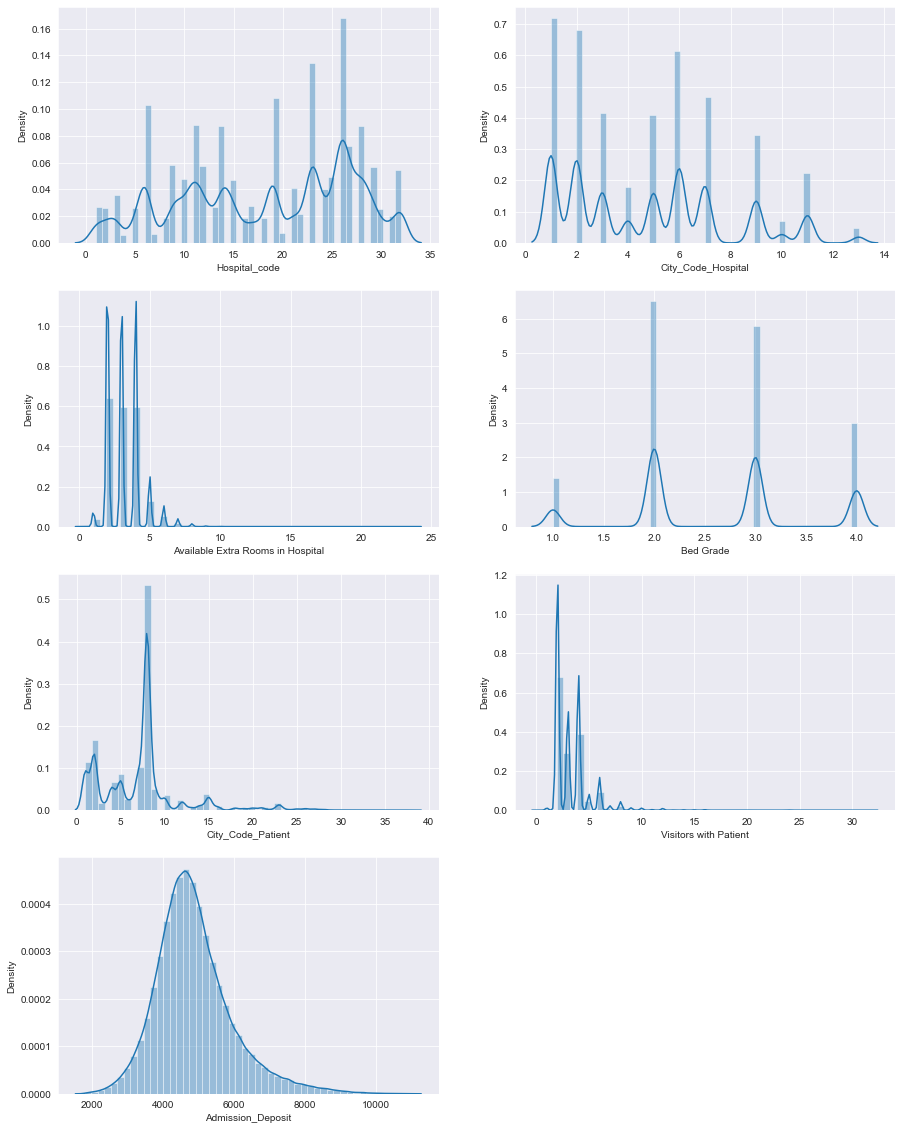

In [27]:
i=1
plt.figure(figsize=(15,20))
for col in num_data:
    plt.subplot(4,2,i)
    sns.distplot(patients_train[col])
    i=i+1
    
plt.show()

As most of the features are of categorial type we will take a look at their distribution using bar charts. To save some time and some lines of code, we will make a 'bar_chart' function to create the bar_chart for any feature we want to explore.

In [29]:
def bar_chart(parameter, figsize=(8,8)):
    target_counts = patients_train[parameter].value_counts()
    target_perc = target_counts.div(target_counts.sum(), axis=0)
    plt.figure(figsize=figsize)
    ax = sns.barplot(x=target_counts.index.values, y=target_counts.values, order=target_counts.index)
    plt.xticks(rotation=90)
    plt.xlabel(f'{parameter}', fontsize=12)
    plt.ylabel('# of occurances', fontsize=12)

    rects = ax.patches
    labels = np.round(target_perc.values*100, 2)
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, height + 5, f'{label}%', ha='center', va='bottom')

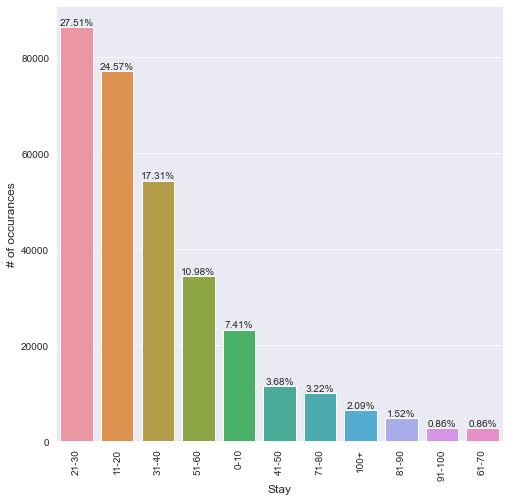

In [30]:
bar_chart('Stay')

Unfortunately data is very imbalanced. Data related patients with the stay for more than 60 days is only about 10% of the overall data and for stay less than 40 days is almost 80% of the total data. We will look some at some techniques to tackle this imabalnce problem while training

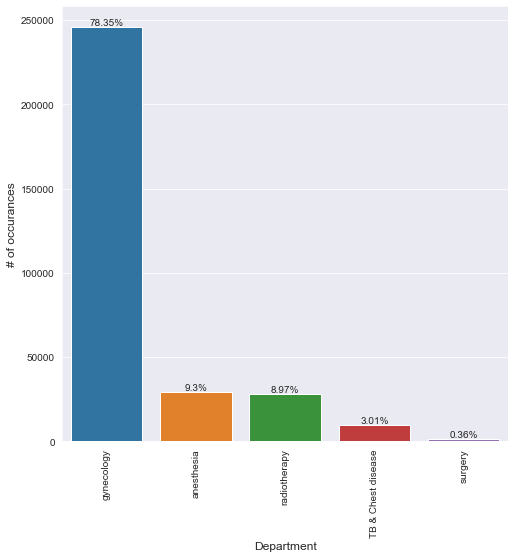

In [31]:
bar_chart('Department')

Bar chart shows that most of the patients were admitted in gynecology department.

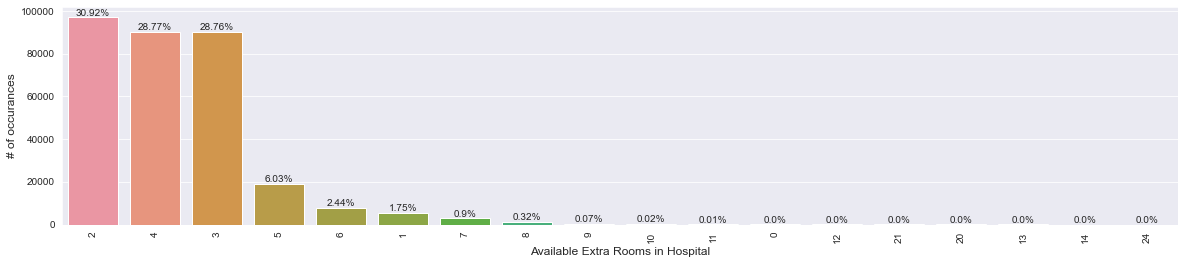

In [32]:
bar_chart('Available Extra Rooms in Hospital', figsize=(20, 4))

By looking at the chart, we can say that in general 2-4 rooms were available.

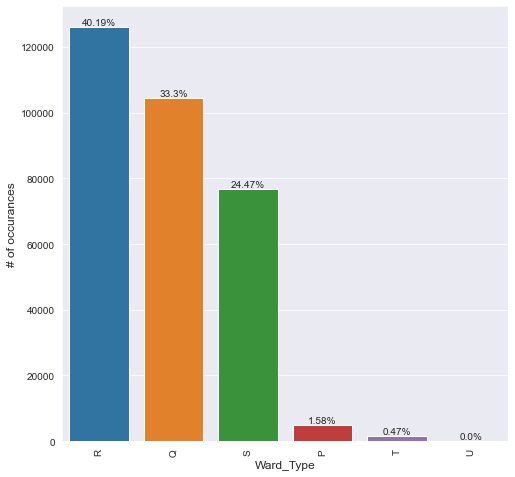

In [33]:
bar_chart('Ward_Type')

This shows that almost 97% of the total patients were admitted in 'R', 'S' and 'Q' type of ward.

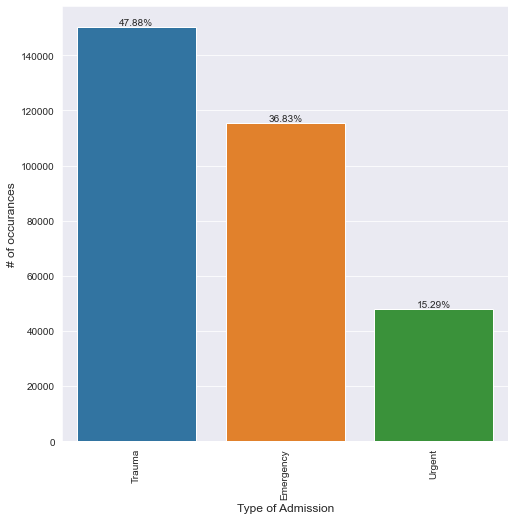

In [34]:
bar_chart('Type of Admission')

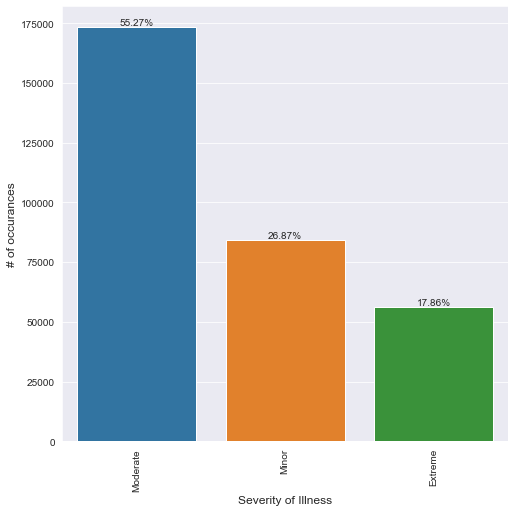

In [35]:
bar_chart('Severity of Illness')

In [36]:
#bar_chart('Bed Grade')

In [37]:
#bar_chart('Hospital_region_code')

<AxesSubplot:xlabel='Admission_Deposit'>

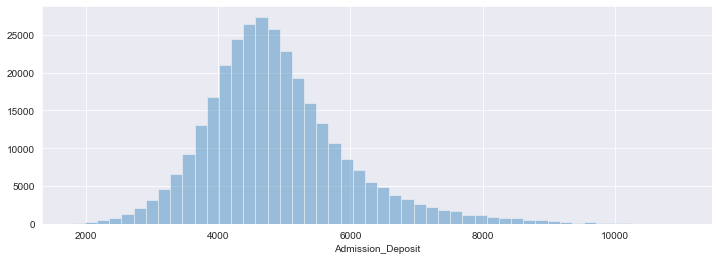

In [38]:
plt.figure(figsize=(12,4))
sns.distplot(patients_train['Admission_Deposit'], kde=False, bins=50)

By looking at the distribution of the admission deposits, we can see that the average admission deposit is 5000 and the distribution is of Gaussian type

### Bivariate Analysis

Upto this point we looked at the nature of distributions of some of the important features. Now will look at how these features affect the target variable i.e. stay of the patients in the hospital.

In [39]:
order = ['0-10', '11-20', '21-30', '31-40', 
         '41-50', '51-60', '61-70', '71-80', '81-90', '91-100', '100+']

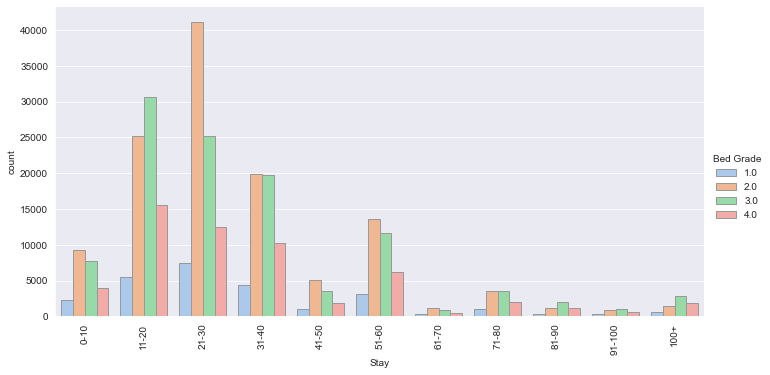

In [40]:
sns.catplot(x="Stay", hue="Bed Grade", kind="count",
            palette="pastel", edgecolor=".6",
            data=patients_train, height=5, aspect=2, order=order)
plt.xticks(rotation=90);

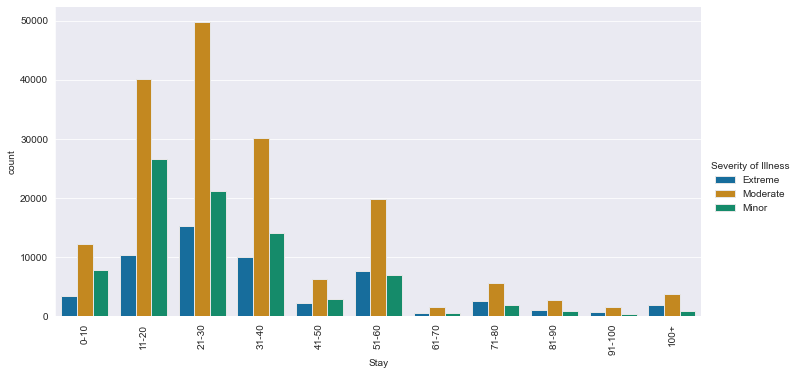

In [41]:
sns.catplot(x="Stay", hue="Severity of Illness", kind="count",
            palette="colorblind", edgecolor=".9",
            data=patients_train, height=5, aspect=2, order=order)
plt.xticks(rotation=90);

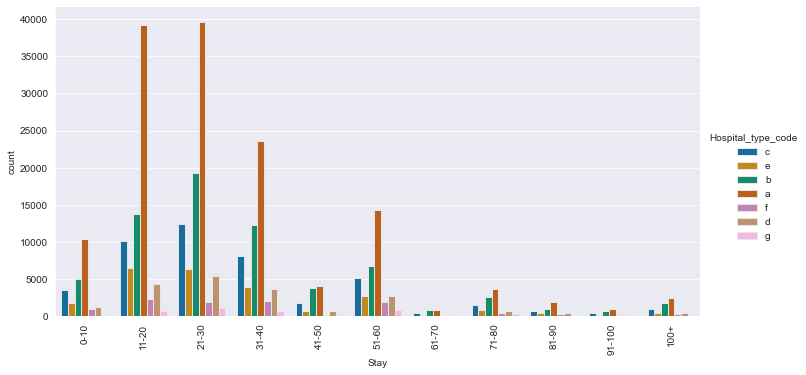

In [42]:
sns.catplot(x="Stay", hue="Hospital_type_code", kind="count",
            palette="colorblind", edgecolor=".9",
            data=patients_train, height=5, aspect=2, order=order)
plt.xticks(rotation=90);

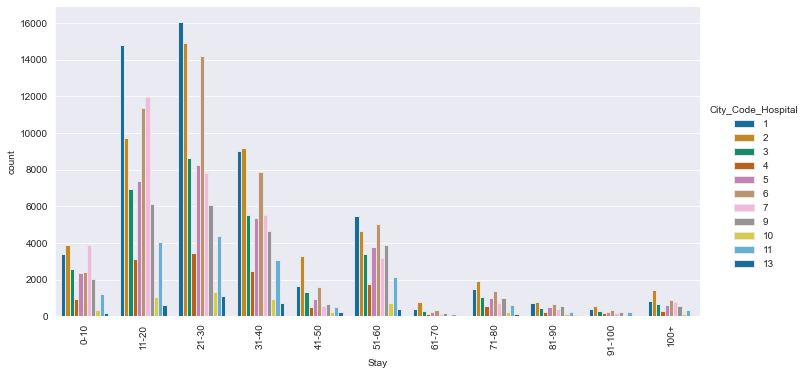

In [43]:
sns.catplot(x="Stay", hue="City_Code_Hospital", kind="count",
            palette="colorblind", edgecolor=".9",
            data=patients_train, height=5, aspect=2, order=order)
plt.xticks(rotation=90);

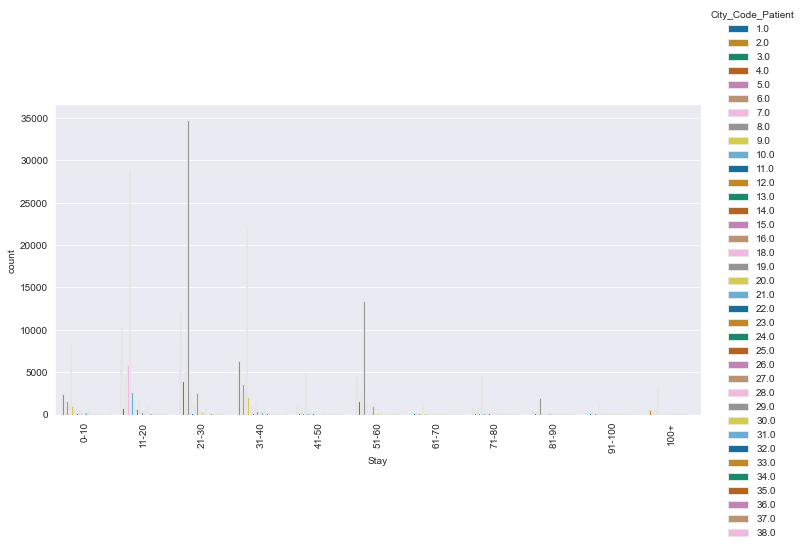

In [44]:
sns.catplot(x="Stay", hue="City_Code_Patient", kind="count",
            palette="colorblind", edgecolor=".9",
            data=patients_train, height=5, aspect=2, order=order)
plt.xticks(rotation=90);

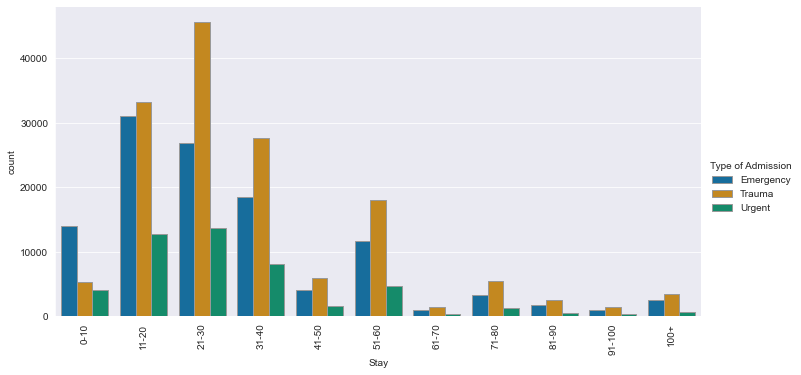

In [45]:
sns.catplot(x='Stay', hue="Type of Admission", kind="count",
            palette="colorblind", edgecolor=".6",
            data=patients_train, height=5, aspect=2, order=order)
plt.xticks(rotation=90);

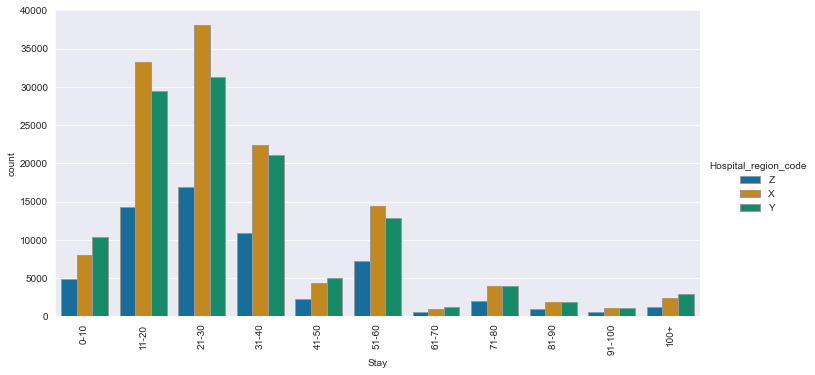

In [46]:
sns.catplot(x='Stay', hue="Hospital_region_code", kind="count",
            palette="colorblind", edgecolor=".6",
            data=patients_train, height=5, aspect=2, order=order)
plt.xticks(rotation=90);

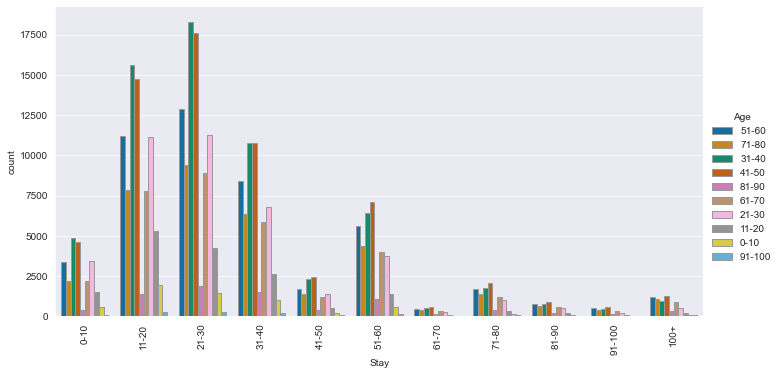

In [47]:
sns.catplot(x='Stay', hue="Age", kind="count",
            palette="colorblind", edgecolor=".6",
            data=patients_train, height=5, aspect=2, order=order)
plt.xticks(rotation=90);

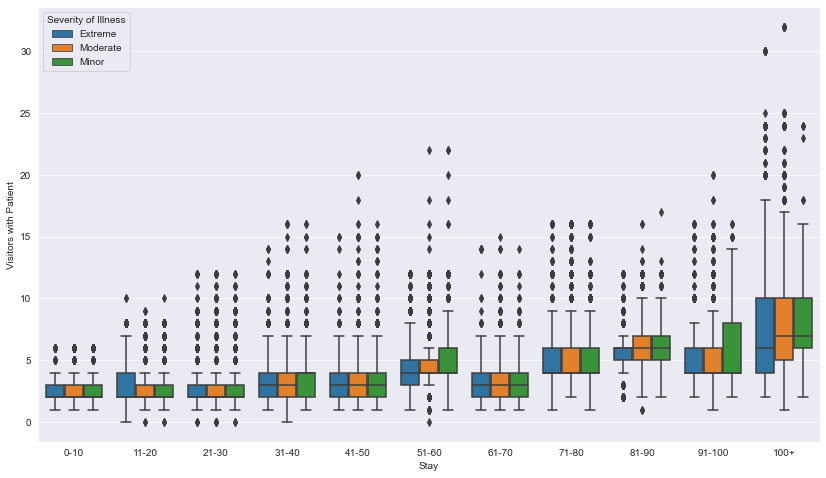

In [48]:
plt.figure(figsize=(14,8))
sns.boxplot(y='Visitors with Patient',x='Stay', hue="Severity of Illness", order=order, data=patients_train);

This shows that number of visitors are increasing with longer stay.However, We can see that there are lots of outliers present in the dataset.

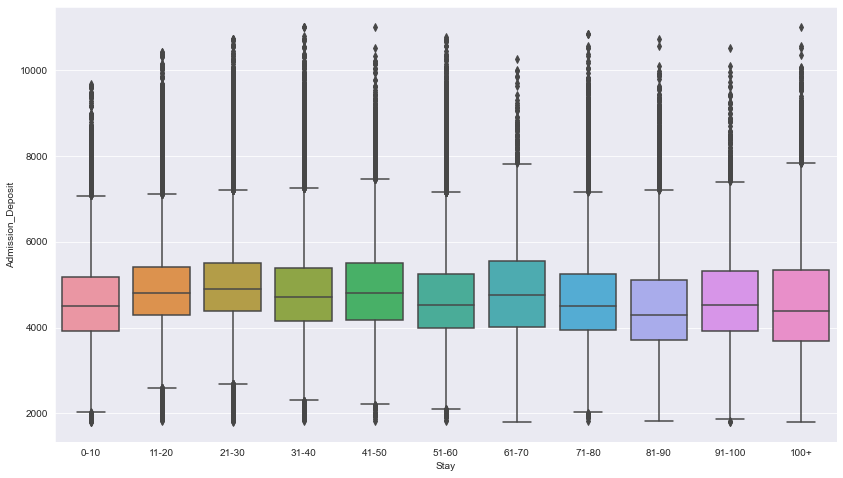

In [49]:
plt.figure(figsize=(14,8))
sns.boxplot(x='Stay',y='Admission_Deposit', order=order, data=patients_train);

Amount depostied doesn't have any strong relation with the stay of the patient in the hospital.

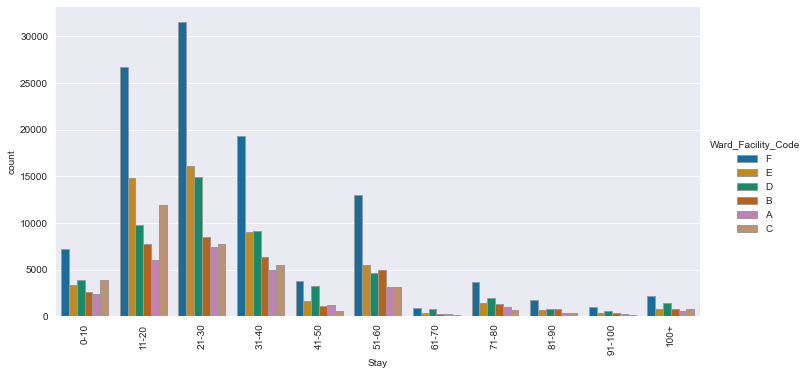

In [50]:
sns.catplot(x='Stay', hue="Ward_Facility_Code", kind="count",
            palette="colorblind", edgecolor=".6",
            data=patients_train, height=5, aspect=2, order=order)
plt.xticks(rotation=90);

ward type also does not have significant relationship with the stay of the patient.

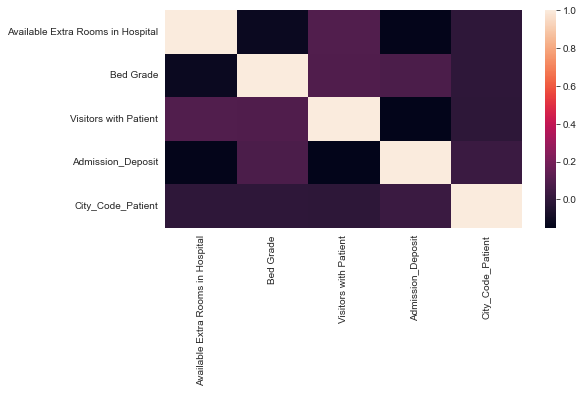

In [51]:
heatmapdata = patients_train[['Stay', 'Available Extra Rooms in Hospital', 'Bed Grade', 'Visitors with Patient'
    , 'Admission_Deposit', 'Age', 'City_Code_Patient']]

cormat = heatmapdata.corr()
fig, ax = plt.subplots(figsize = (8,4))
sns.heatmap(data = cormat)
plt.show()

## Making data suitable for passing into Model

## Encoding Categorical Data

In [52]:
from sklearn.preprocessing import LabelEncoder

le= LabelEncoder()
cat_data.append('Bed Grade')
cat_data.append('City_Code_Hospital')
cat_data.append('City_Code_Patient')
for col in cat_data:
    patients_train[col]= le.fit_transform(patients_train[col])

In [53]:
patients_train[cat_data]

,Hospital_type_code,Hospital_region_code,Department,Ward_Type,Ward_Facility_Code,Type of Admission,Severity of Illness,Age,Stay,Bed Grade,City_Code_Hospital,City_Code_Patient
0,2,2,3,2,5,0,0,5,0,1,2,6
1,2,2,3,3,5,1,0,5,5,1,4,6
2,4,0,1,3,4,1,0,5,4,1,0,6
3,1,1,3,2,3,1,0,5,5,1,1,6
4,1,1,3,3,3,1,0,5,5,1,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...
318433,0,0,3,1,5,0,2,4,2,3,5,21
318434,0,0,1,1,4,2,2,8,4,3,0,7
318435,0,0,2,2,5,0,1,7,2,3,3,9
318436,1,1,1,1,3,1,1,1,2,2,1,7


In [54]:
patients_train['City_Code_Hospital'].value_counts()

0     54181
1     51178
5     46128
6     35144
2     31168
4     30743
7     25947
9     16947
3     13577
8      5188
10     3592
Name: City_Code_Hospital, dtype: int64

In [55]:
#patients_train['City_Code_Patient'].value_counts()

In [56]:
num_data.remove('Bed Grade')
num_data.remove('City_Code_Hospital')
num_data.remove('City_Code_Patient')
num_data

['Hospital_code',
 'Available Extra Rooms in Hospital',
 'Visitors with Patient',
 'Admission_Deposit']

<AxesSubplot:>

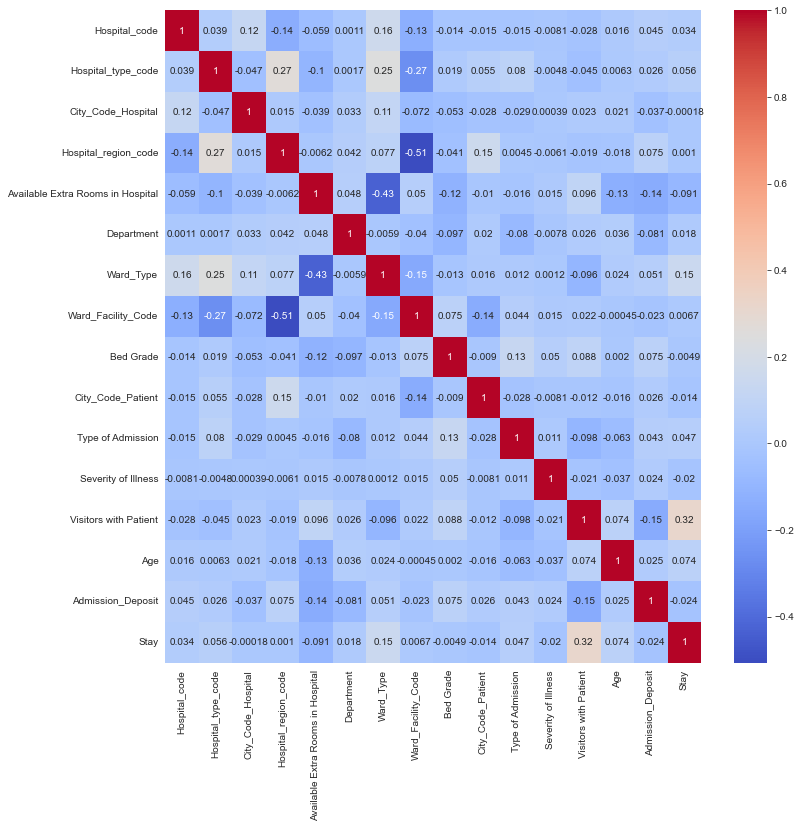

In [57]:
plt.figure(figsize=(12,12))
sns.heatmap(patients_train.corr(), annot=True, cmap='coolwarm')

## Scaling Numercial Data

In [58]:
from sklearn.preprocessing import StandardScaler

ss= StandardScaler()

patients_train[num_data]= ss.fit_transform(patients_train[num_data].values)

In [59]:
patients_train

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,-1.196074,2,2,2,-0.168178,3,2,5,1,6,0,0,-0.727035,5,0.026796,0
1,-1.891033,2,4,2,-1.024400,3,3,5,1,6,1,0,-0.727035,5,0.986987,5
2,-0.964420,4,0,0,-1.024400,1,3,4,1,6,1,0,-0.727035,5,-0.126025,4
3,0.888804,1,1,1,-1.024400,3,2,3,1,6,1,0,-0.727035,5,2.200344,5
4,0.888804,1,1,1,-1.024400,3,3,3,1,6,1,0,-0.727035,5,0.622427,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,-1.427727,0,5,0,-0.168178,3,1,5,3,21,0,2,-0.159419,4,-0.679308,2
318434,0.657151,0,0,0,-1.024400,1,1,4,3,7,2,2,0.408197,8,1.672838,4
318435,-1.311900,0,3,0,-0.168178,2,2,5,3,9,0,1,-0.159419,7,-0.595533,2
318436,-0.848594,1,1,1,-0.168178,1,1,3,2,7,1,1,0.975813,1,-1.031900,2


In [60]:
from sklearn.model_selection import train_test_split

y= patients_train['Stay']
X= patients_train.drop('Stay', axis=1)

In [61]:
X

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,-1.196074,2,2,2,-0.168178,3,2,5,1,6,0,0,-0.727035,5,0.026796
1,-1.891033,2,4,2,-1.024400,3,3,5,1,6,1,0,-0.727035,5,0.986987
2,-0.964420,4,0,0,-1.024400,1,3,4,1,6,1,0,-0.727035,5,-0.126025
3,0.888804,1,1,1,-1.024400,3,2,3,1,6,1,0,-0.727035,5,2.200344
4,0.888804,1,1,1,-1.024400,3,3,3,1,6,1,0,-0.727035,5,0.622427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,-1.427727,0,5,0,-0.168178,3,1,5,3,21,0,2,-0.159419,4,-0.679308
318434,0.657151,0,0,0,-1.024400,1,1,4,3,7,2,2,0.408197,8,1.672838
318435,-1.311900,0,3,0,-0.168178,2,2,5,3,9,0,1,-0.159419,7,-0.595533
318436,-0.848594,1,1,1,-0.168178,1,1,3,2,7,1,1,0.975813,1,-1.031900


In [62]:
y

0         0
1         5
2         4
3         5
4         5
         ..
318433    2
318434    4
318435    2
318436    2
318437    0
Name: Stay, Length: 313793, dtype: int32

In [63]:
X_train, X_test, y_train,y_test= train_test_split(X,y,test_size= 0.2, stratify=y, random_state=42)

## Building the Model 

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import RandomizedSearchCV

In [65]:
value= [LogisticRegression(), RandomForestClassifier(), DecisionTreeClassifier(),  
        KNeighborsClassifier(), XGBClassifier()]

key= ['LogisticRegression', 'RandomForsetClassifier', 'DecisionTreeClassifier', 
      'KNeighborsClassifier', 'XGBClassifier']

models= dict(zip(key,value))
accuracy_scores=[]
for key,value in models.items():
    value.fit(X_train,y_train)
    y_pred= value.predict(X_test)
    accuracy= accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(key)
    print(accuracy)

LogisticRegression
0.3805669306394302
RandomForsetClassifier
0.38271801653946047
DecisionTreeClassifier
0.2980130339871572
KNeighborsClassifier
0.33725840118548733
XGBClassifier
0.42667983874822735


<AxesSubplot:>

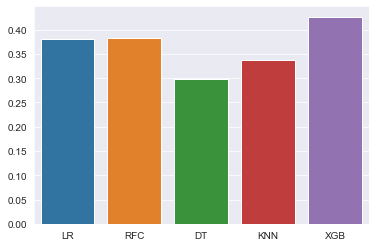

In [66]:
sns.barplot(x= ['LR','RFC','DT','KNN','XGB'],y=accuracy_scores)

From the graph it can be seen that the best model is XgBoost

### Hyperparameter Tuning

In [67]:
params= {'objective':['binary:logistic'],
              'max_depth': [3,4,5,6],
              'min_child_weight': [1,5,10,12],
              'subsample': [0.6,0.8,1.0],
              'colsample_bytree': [0.6,0.8,1.0], 'gamma': [0.5,1,1.5,2]}

xgb= XGBClassifier(n_estimators=600)

grid= RandomizedSearchCV(xgb, cv=3, verbose=3,param_distributions= params, n_iter=5)
grid.fit(X,y)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV 1/3] END colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=10, objective=binary:logistic, subsample=1.0;, score=0.426 total time= 1.7min
[CV 2/3] END colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=10, objective=binary:logistic, subsample=1.0;, score=0.425 total time= 1.6min
[CV 3/3] END colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=10, objective=binary:logistic, subsample=1.0;, score=0.409 total time= 1.7min
[CV 1/3] END colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=10, objective=binary:logistic, subsample=0.8;, score=0.425 total time= 2.5min
[CV 2/3] END colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=10, objective=binary:logistic, subsample=0.8;, score=0.425 total time= 2.5min
[CV 3/3] END colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=10, objective=binary:logistic, subsample=0.8;, score=0.410 total time= 2.5min
[CV 1/3] END col

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,...
                                           monotone_constraints=None,
                                           n_estimators=600, n_jobs=

In [69]:
grid.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.6,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=2, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=12,
              missing=nan, monotone_constraints='()', n_estimators=600,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [70]:
y_pred= grid.best_estimator_.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.45344890772638186
[[  950     0  2166  1496    28     3     6     0     1     0     0]
 [   12   613    53    82    91     1   353     0    17    82     6]
 [  416     2  8200  5678   662     2   451     0     3     5     0]
 [  302    11  4584 11852   253     5   230     1     4    21     0]
 [  175    21  1842  4423  2685     4  1683     0    16    12     1]
 [   72    10   396  1461   165    22   170     0     6     5     1]
 [   71    73   505   980  1446     8  3680     1     9   118     2]
 [    9    16    54   307    38     1    90     6     6    10     3]
 [   25   111   108   224   381     0  1003     1   124    40     2]
 [   10    78    34    53    95     0   378     0     9   295     0]
 [    7    49    33    56    83     0   264     1    11     8    31]]
              precision    recall  f1-score   support

           0       0.46      0.20      0.28      4650
           1       0.62      0.47      0.53      1310
           2       0.46      0.53      0.49     15419
   

# Working with Test Data

In [71]:
patients_test= pd.read_csv('test_data.csv')

In [72]:
patients_test.head(10)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,318439,21,c,3,Z,3,gynecology,S,A,2.0,17006,2.0,Emergency,Moderate,2,71-80,3095.0
1,318440,29,a,4,X,2,gynecology,S,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4018.0
2,318441,26,b,2,Y,3,gynecology,Q,D,4.0,17006,2.0,Emergency,Moderate,3,71-80,4492.0
3,318442,6,a,6,X,3,gynecology,Q,F,2.0,17006,2.0,Trauma,Moderate,3,71-80,4173.0
4,318443,28,b,11,X,2,gynecology,R,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4161.0
5,318444,23,a,6,X,3,gynecology,Q,F,2.0,17006,2.0,Trauma,Moderate,2,71-80,4659.0
6,318445,26,b,2,Y,2,gynecology,Q,D,2.0,17006,2.0,Trauma,Moderate,2,71-80,4167.0
7,318446,25,e,1,X,4,gynecology,S,E,3.0,95946,NaN,Emergency,Moderate,2,31-40,4396.0
8,318447,23,a,6,X,4,gynecology,Q,F,3.0,95946,NaN,Trauma,Moderate,2,31-40,4088.0
9,318448,23,a,6,X,3,gynecology,Q,F,4.0,95946,NaN,Urgent,Moderate,2,31-40,3925.0


## General Analysis

In [73]:
print("Rows and Columns for the test dataset:")
print("Rows:",patients_test.shape[0])
print("Columns:",patients_test.shape[1])

Rows and Columns for the test dataset:
Rows: 137057
Columns: 17


In [74]:
patients_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137057 entries, 0 to 137056
Data columns (total 17 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            137057 non-null  int64  
 1   Hospital_code                      137057 non-null  int64  
 2   Hospital_type_code                 137057 non-null  object 
 3   City_Code_Hospital                 137057 non-null  int64  
 4   Hospital_region_code               137057 non-null  object 
 5   Available Extra Rooms in Hospital  137057 non-null  int64  
 6   Department                         137057 non-null  object 
 7   Ward_Type                          137057 non-null  object 
 8   Ward_Facility_Code                 137057 non-null  object 
 9   Bed Grade                          137022 non-null  float64
 10  patientid                          137057 non-null  int64  
 11  City_Code_Patient                  1349

### Finding out the no of Null Values and calculating their percentage for each column

In [75]:
print("Total no of null values in each column:")
print(patients_test.isnull().sum())

Total no of null values in each column:
case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                              35
patientid                               0
City_Code_Patient                    2157
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
dtype: int64


In [76]:
percent_missing = patients_test.isnull().sum() * 100 / len(patients_test)
missing_values_df = pd.DataFrame({'column_name': patients_test.columns,
                                 'Values missing(%)': percent_missing})
missing_values_df

,column_name,Values missing(%)
case_id,case_id,0.000000
Hospital_code,Hospital_code,0.000000
Hospital_type_code,Hospital_type_code,0.000000
City_Code_Hospital,City_Code_Hospital,0.000000
Hospital_region_code,Hospital_region_code,0.000000
Available Extra Rooms in Hospital,Available Extra Rooms in Hospital,0.000000
Department,Department,0.000000
Ward_Type,Ward_Type,0.000000
Ward_Facility_Code,Ward_Facility_Code,0.000000
Bed Grade,Bed Grade,0.025537


In [77]:
patients_test = patients_test.dropna()

In [78]:
print("Rows and Columns for the test dataset:")
print("Rows:",patients_test.shape[0])
print("Columns:",patients_test.shape[1])

Rows and Columns for the test dataset:
Rows: 134865
Columns: 17


In [79]:
submission = pd.DataFrame()
submission['case_id'] = patients_test['case_id']

In [80]:
patients_test.drop(['case_id', 'patientid'], axis=1, inplace=True)

In [81]:
cat_data.remove('Stay')
for col in cat_data:
    
    patients_test[col]= le.fit_transform(patients_test[col])

In [82]:
patients_test[num_data]= ss.transform(patients_test[num_data].values)

In [83]:
print("Rows and Columns for the test dataset:")
print("Rows:",patients_test.shape[0])
print("Columns:",patients_test.shape[1])

Rows and Columns for the test dataset:
Rows: 134865
Columns: 15


In [84]:
predictions= grid.best_estimator_.predict(patients_test)

In [85]:
submission['Stay']= predictions

In [86]:
submission['Stay']= submission['Stay'].replace({0:'0-10', 1:'11-20', 2:'21-30', 3:'31-40', 
         4:'41-50', 5:'51-60', 6:'61-70', 7:'71-80', 8:'81-90', 9:'91-100', 10:'100+'})

In [87]:
submission

,case_id,Stay
0,318439,0-10
1,318440,61-70
2,318441,31-40
3,318442,31-40
4,318443,61-70
...,...,...
137052,455491,31-40
137053,455492,0-10
137054,455493,31-40
137055,455494,21-30
